# Installs e imports

In [ ]:
!pip install datasets
!pip install huggingface_hub
!pip install pandas
!pip install mlpack

!pip install --upgrade ipywidgets
!jupyter nbextension enable --py widgetsnbextension
!jupyter nbextension enable --py --sys-prefix widgetsnbextension
!jupyter labextension install @jupyter-widgets/jupyterlab-manager

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 14.0 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.9/44.9 MB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 25.5 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: w

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV as RSCV
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

import pickle

from datasets import load_dataset
import os
import json

# Dataset generation


In [ ]:
!python -c "KEY"

In [ ]:
def save_text_to_file(texts, folder_path, file_name):
  """
  Save the given text to a file in the specified folder.

  Parameters:
  - texts (str): The texts to be saved.
  - folder_path (str): The path to the folder where the file will be saved.
  - file_name (str): The name of the file to be created.

  Returns:
  - success (bool): True if the texts was successfully saved, False otherwise.
  """
  import os
  print("Saving to ", os.path.join(folder_path, file_name))
  try:
      # Create the folder if it doesn't exist
      if not os.path.exists(folder_path):
          os.makedirs(folder_path)

      # Combine folder path and file name
      file_path = os.path.join(folder_path, file_name)

      # Open the file in write mode with UTF-8 encoding
      with open(file_path, 'w', encoding='utf-8') as file:
          # Write the text to the file
          json.dump(texts, file)

  except Exception as e:
        print(f'Error saving text to file: {e}')
        return False

In [ ]:

programming_languages = ["c","c++","c-sharp","css","dart","dockerfile",
                         "go","html","java","javascript","json","kotlin","lua",
                         "php","powershell",
                        "python","ruby","rust","shell","solidity","sql","swift",
                        "typescript","xml"]


In [ ]:
# Function to save data for a specific programming language
def save_data():
    # Directory to save the data
    save_dir = "programming_language_data"

    # Create the directory if it does not exist
    os.makedirs(save_dir, exist_ok=True)
    for lang in programming_languages:
      try:
        save_dir_lang = save_dir + "/" + lang
        os.makedirs(save_dir_lang, exist_ok=True)
        # Load the "the stack" dataset from Hugging Face
        ds_lang = load_dataset("bigcode/the-stack", data_dir="data/" + lang, streaming=True, split="train")
        contents = list(map(lambda x: x["content"],ds_lang.take(2500)))
        save_text_to_file(contents, save_dir_lang,  lang + ".txt")
      except Exception as e:
        print("Language ", lang, " was not found: ", e)

In [ ]:
save_data()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Resolving data files:   0%|          | 0/257 [00:00<?, ?it/s]

Saving to  programming_language_data/c/c.txt


Resolving data files:   0%|          | 0/214 [00:00<?, ?it/s]

Saving to  programming_language_data/c++/c++.txt


Resolving data files:   0%|          | 0/142 [00:00<?, ?it/s]

Saving to  programming_language_data/c-sharp/c-sharp.txt


Resolving data files:   0%|          | 0/147 [00:00<?, ?it/s]

Saving to  programming_language_data/css/css.txt
Saving to  programming_language_data/dart/dart.txt
Saving to  programming_language_data/dockerfile/dockerfile.txt


Resolving data files:   0%|          | 0/115 [00:00<?, ?it/s]

Saving to  programming_language_data/go/go.txt


Resolving data files:   0%|          | 0/802 [00:00<?, ?it/s]

Saving to  programming_language_data/html/html.txt


Resolving data files:   0%|          | 0/285 [00:00<?, ?it/s]

Saving to  programming_language_data/java/java.txt


Resolving data files:   0%|          | 0/499 [00:00<?, ?it/s]

Saving to  programming_language_data/javascript/javascript.txt


Resolving data files:   0%|          | 0/1329 [00:00<?, ?it/s]

Saving to  programming_language_data/json/json.txt
Saving to  programming_language_data/kotlin/kotlin.txt
Saving to  programming_language_data/lua/lua.txt


Resolving data files:   0%|          | 0/198 [00:00<?, ?it/s]

Saving to  programming_language_data/php/php.txt
Saving to  programming_language_data/powershell/powershell.txt


Resolving data files:   0%|          | 0/206 [00:00<?, ?it/s]

Saving to  programming_language_data/python/python.txt


Resolving data files:   0%|          | 0/29 [00:00<?, ?it/s]

Saving to  programming_language_data/ruby/ruby.txt


Resolving data files:   0%|          | 0/40 [00:00<?, ?it/s]

Saving to  programming_language_data/rust/rust.txt
Saving to  programming_language_data/shell/shell.txt
Saving to  programming_language_data/solidity/solidity.txt


Resolving data files:   0%|          | 0/21 [00:00<?, ?it/s]

Saving to  programming_language_data/sql/sql.txt
Saving to  programming_language_data/swift/swift.txt


Resolving data files:   0%|          | 0/139 [00:00<?, ?it/s]

Saving to  programming_language_data/typescript/typescript.txt


Resolving data files:   0%|          | 0/297 [00:00<?, ?it/s]

Saving to  programming_language_data/xml/xml.txt


# Train/Test


In [ ]:
#root_dir = '/content/programming_language_data/' # Google Collab
root_dir = 'programming_language_data'
data = []
for class_folder in os.listdir(root_dir):
   if os.path.isdir(os.path.join(root_dir, class_folder)):
       with open(os.path.join(root_dir, class_folder, class_folder + '.txt'), 'r') as f:
           json_data = json.load(f)
           df = pd.DataFrame(json_data)
           df['class'] = class_folder
           data.append(df)
df_final = pd.concat(data, ignore_index=True)

In [ ]:
def generate_confusion_matrix(y_test, labels_test, class_labels):
    confusion = confusion_matrix(y_test, labels_test, labels=class_labels)

    plt.figure(figsize=(20, 20))
    sns.set(font_scale=1)
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_labels, yticklabels=class_labels, vmax=30)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

In [ ]:
testing = """
#endregion License Information (GPL v3)

// http://www.lyquidity.com/devblog/?p=136

using ShareX.HelpersLib.Properties;
using System;
using System.Reflection;
using System.Windows.Forms;

namespace ShareX.HelpersLib
{

    public class FolderSelectDialog : IDisposable
    {

        public bool ShowDialog(IntPtr hWndOwner)
        {
            bool flag;

            if (Helpers.IsWindowsVistaOrGreater())
            {
                Reflector r = new Reflector("System.Windows.Forms");

                uint num = 0;
                Type typeIFileDialog = r.GetType("FileDialogNative.IFileDialog");
                object dialog = r.Call(ofd, "CreateVistaDialog");
                r.Call(ofd, "OnBeforeVistaDialog", dialog);

                uint options = (uint)r.CallAs(typeof(FileDialog), ofd, "GetOptions");
                options |= (uint)r.GetEnum("FileDialogNative.FOS", "FOS_PICKFOLDERS");
                r.CallAs(typeIFileDialog, dialog, "SetOptions", options);

                object pfde = r.New("FileDialog.VistaDialogEvents", ofd);
                object[] parameters = new object[] { pfde, num };
                r.CallAs2(typeIFileDialog, dialog, "Advise", parameters);
                num = (uint)parameters[1];
                try
                {
                    int num2 = (int)r.CallAs(typeIFileDialog, dialog, "Show", hWndOwner);
                    flag = num2 == 0;
                }
                finally
                {
                    r.CallAs(typeIFileDialog, dialog, "Unadvise", num);
                    GC.KeepAlive(pfde);
                }
            }
            else
            {
                using (FolderBrowserDialog fbd = new FolderBrowserDialog())
                {
                    fbd.Description = Title;
                    fbd.SelectedPath = InitialDirectory;
                    if (fbd.ShowDialog(new WindowWrapper(hWndOwner)) != DialogResult.OK) return false;
                    ofd.FileName = fbd.SelectedPath;
                    flag = true;
                }
            }

            return flag;
        }

        public void Dispose()
        {
            if (ofd != null)
            {
                ofd.Dispose();
            }
        }
    }

}"""

## Random forest


In [ ]:
model = Pipeline([
    ('tfidf', TfidfVectorizer(token_pattern=r"\b\w+\b|[.,!?;:'\n\t (){}\[\]\"`+*/<>=&|$%^~#]", ngram_range=(1,1))),  # Convert text data to TF-IDF features
    ('clf', (RandomForestClassifier(n_estimators=50, verbose=2, n_jobs=-1)))  # Multi-output Random Forest
])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_final[0], df_final['class'], test_size=0.1)

In [ ]:
score = model.fit(X_train, y_train)
labels_train = model.predict(X_train)
score.score(X_train, y_train)

In [ ]:
labels_test = model.predict(X_test)
score.score(X_test, y_test)

In [ ]:
# Train
print("----Train: ----\n")

print("Accuracy: " + str(accuracy_score(y_train, labels_train)))
print("Precision: " + str(precision_score(y_train, labels_train, average='macro')))
print("Recall: " + str(recall_score(y_train, labels_train, average='macro')))
print("F1_Score: " + str(f1_score(y_train, labels_train, average='macro')))

# Test
print("----Test: ----\n")

print("Accuracy: " + str(accuracy_score(y_test, labels_test)))
print("Precision: " + str(precision_score(y_test, labels_test, average='macro')))
print("Recall: " + str(recall_score(y_test, labels_test, average='macro')))
print("F1_Score: " + str(f1_score(y_test, labels_test, average='macro')))

----Train: ----

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1_Score: 1.0
----Test: ----

Accuracy: 0.9175
Precision: 0.9185346879435247
Recall: 0.9191013873987589
F1_Score: 0.9183027807607204


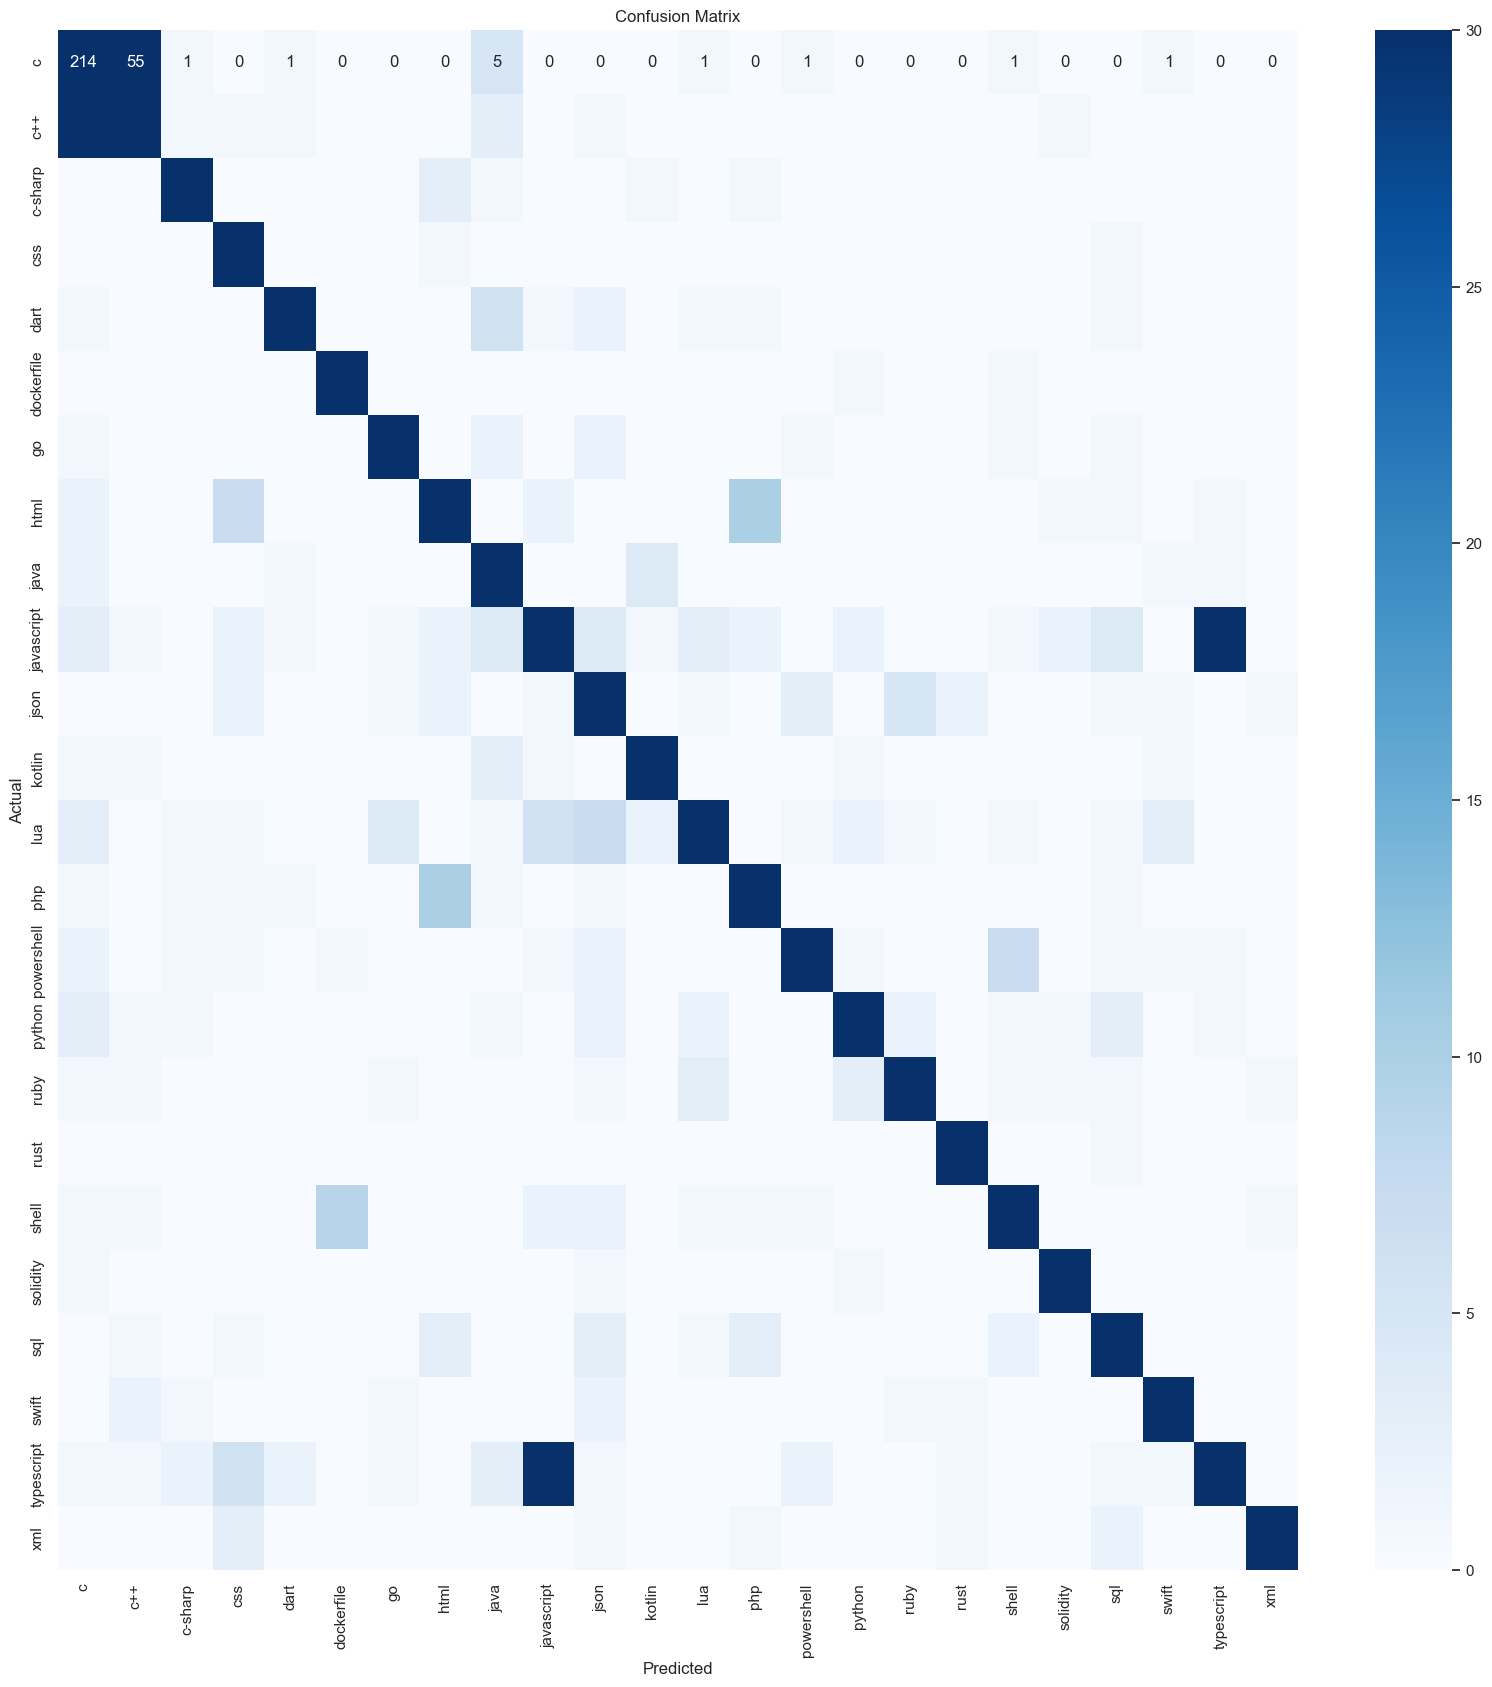

In [ ]:
generate_confusion_matrix(y_test, labels_test, model.classes_)

In [ ]:
%%timeit
r = model.predict([testing])[0]
r

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0

81.4 ms ± 718 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


[Parallel(n_jobs=12)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  50 out of  50 | elapsed:    0.0s finished


In [ ]:
filename = 'random_forest.sav'
pickle.dump(model, open(filename, 'wb'))

## XGBoost


In [ ]:
model = Pipeline([
    ('tfidf', TfidfVectorizer(token_pattern=r"\b\w+\b|[.,!?;:'\n\t (){}\[\]\"`+*/<>=&|$%^~#]", ngram_range=(1,1))),  # Convert text data to TF-IDF features
    ('clf', (GradientBoostingClassifier(n_estimators=50, verbose=2)))  # Boosting
])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_final[0], df_final['class'], test_size=0.1)

In [ ]:
score = model.fit(X_train, y_train)
labels_train = model.predict(X_train)
score.score(X_train, y_train)

      Iter       Train Loss   Remaining Time 


In [ ]:
labels_test = model.predict(X_test)
score.score(X_test, y_test)

In [ ]:
# Train
print("----Train: ----\n")

print("Accuracy: " + str(accuracy_score(y_train, labels_train)))
print("Precision: " + str(precision_score(y_train, labels_train, average='macro')))
print("Recall: " + str(recall_score(y_train, labels_train, average='macro')))
print("F1_Score: " + str(f1_score(y_train, labels_train, average='macro')))

# Test
print("----Test: ----\n")

print("Accuracy: " + str(accuracy_score(y_test, labels_test)))
print("Precision: " + str(precision_score(y_test, labels_test, average='macro')))
print("Recall: " + str(recall_score(y_test, labels_test, average='macro')))
print("F1_Score: " + str(f1_score(y_test, labels_test, average='macro')))

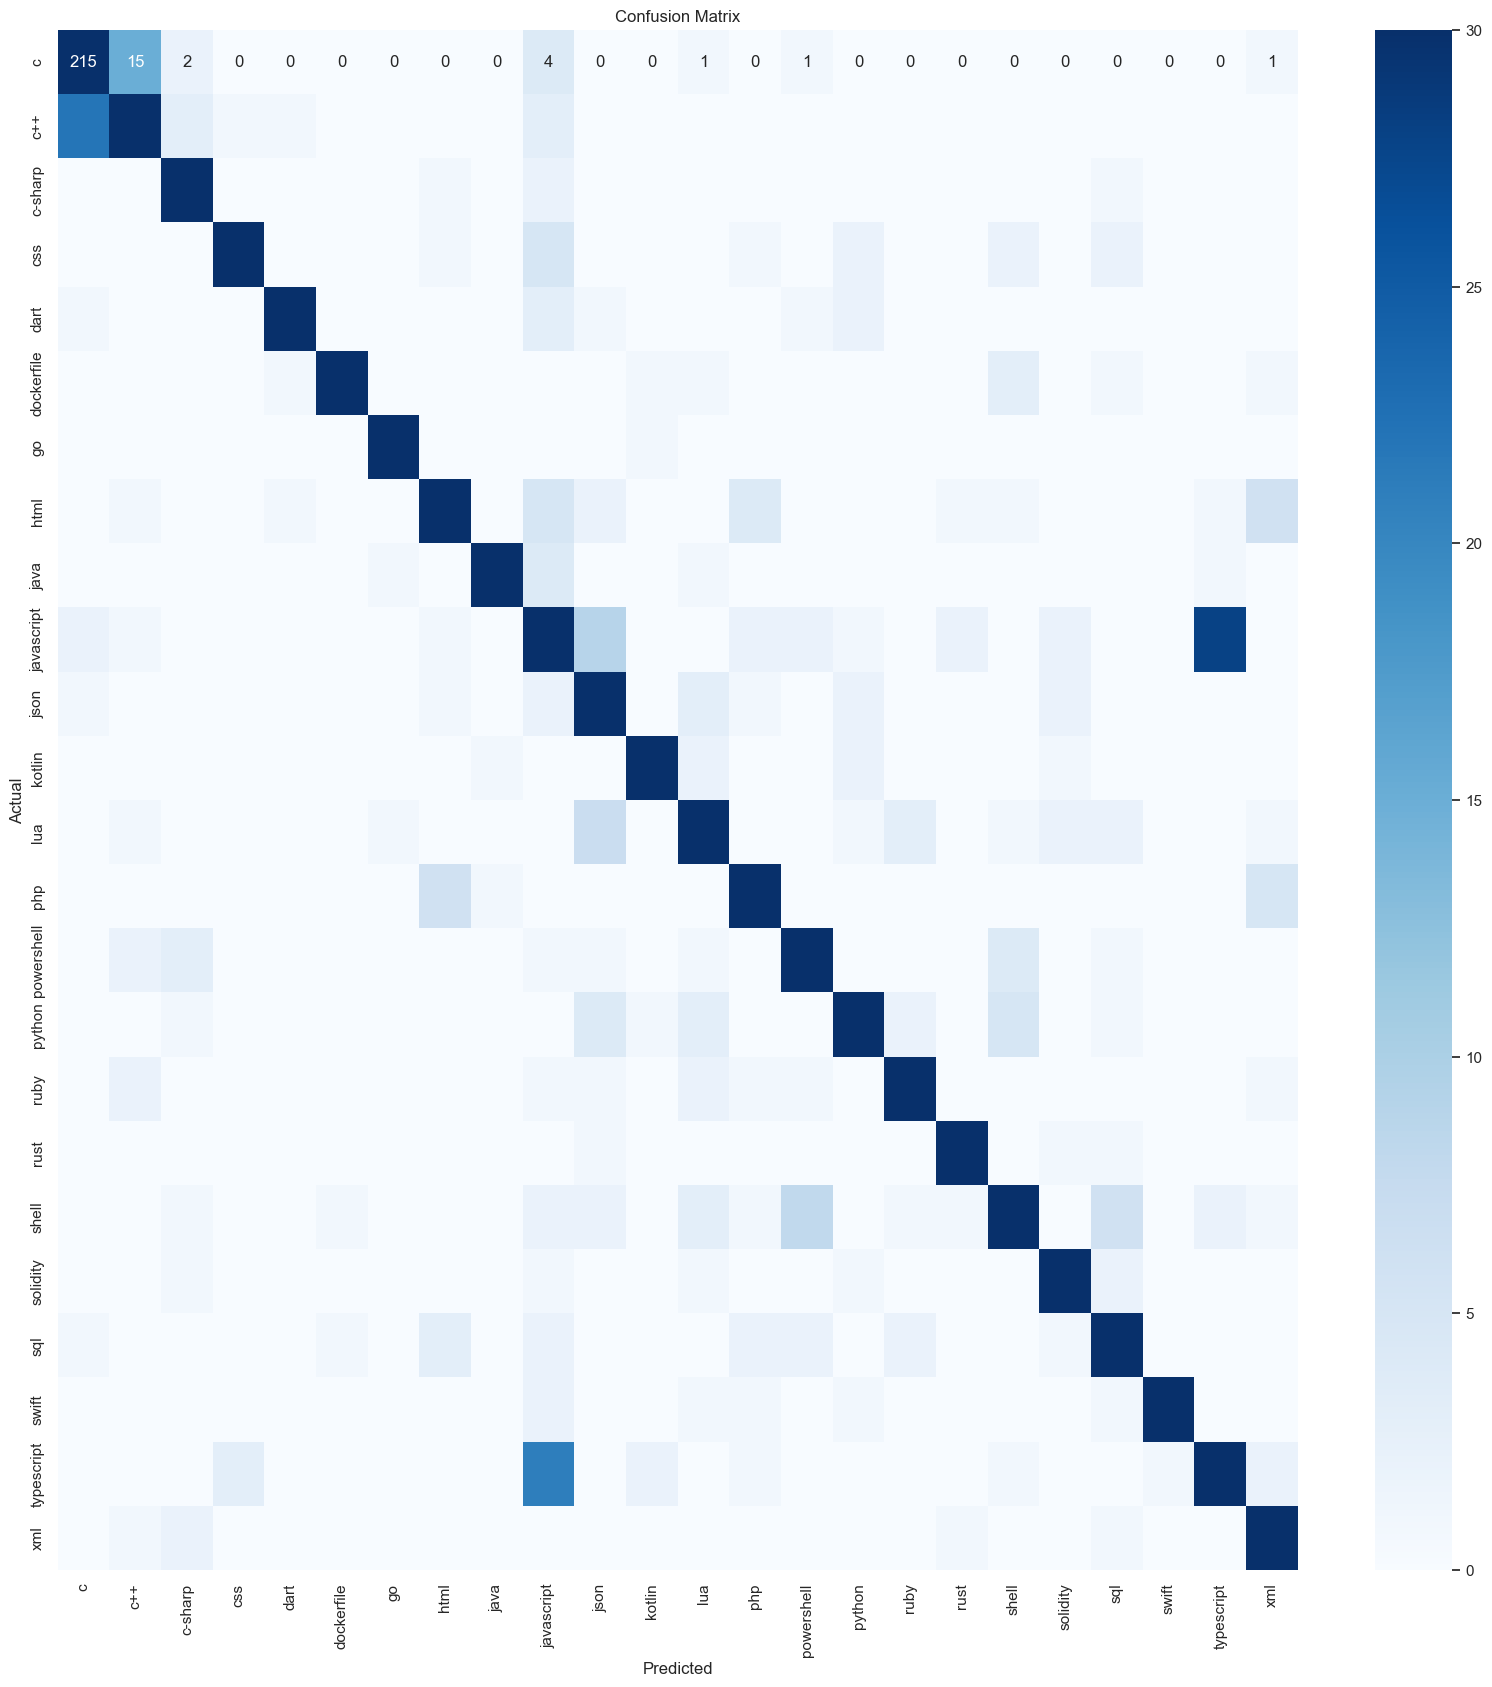

In [ ]:
generate_confusion_matrix(y_test, labels_test, model.classes_)

In [ ]:
%%timeit
r = model.predict([testing])[0]

In [ ]:
filename = 'xgboost.sav'
pickle.dump(model, open(filename, 'wb'))

## Neural Net

In [ ]:
model = Pipeline([
    ('tfidf', TfidfVectorizer(token_pattern=r"\b\w+\b|[.,!?;:'\n\t (){}\[\]\"`+*/<>=&|$%^~#]", ngram_range=(1, 1))),
    ('clf', MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42, verbose=True))
])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_final[0], df_final['class'], test_size=0.9)

In [ ]:
score = model.fit(X_train, y_train)
labels_train = model.predict(X_train)
score.score(X_train, y_train)

Iteration 1, loss = 3.12991926
Iteration 2, loss = 2.90801608
Iteration 3, loss = 2.57758178
Iteration 4, loss = 2.15914169
Iteration 5, loss = 1.72693984
Iteration 6, loss = 1.33807865
Iteration 7, loss = 1.02332581
Iteration 8, loss = 0.78592555
Iteration 9, loss = 0.61371882
Iteration 10, loss = 0.48819327
Iteration 11, loss = 0.39751460
Iteration 12, loss = 0.33031731
Iteration 13, loss = 0.27891326
Iteration 14, loss = 0.23953567
Iteration 15, loss = 0.20875547
Iteration 16, loss = 0.18388784
Iteration 17, loss = 0.16378129
Iteration 18, loss = 0.14715641
Iteration 19, loss = 0.13333435
Iteration 20, loss = 0.12185638
Iteration 21, loss = 0.11213413
Iteration 22, loss = 0.10377232
Iteration 23, loss = 0.09637182
Iteration 24, loss = 0.09012755
Iteration 25, loss = 0.08450744
Iteration 26, loss = 0.07969398
Iteration 27, loss = 0.07532879
Iteration 28, loss = 0.07146191
Iteration 29, loss = 0.06793707
Iteration 30, loss = 0.06482559
Iteration 31, loss = 0.06201027
Iteration 32, los

1.0

In [ ]:
labels_test = model.predict(X_test)
score.score(X_test, y_test)

0.8967592592592593

In [ ]:
# Train
print("----Train: ----\n")

print("Accuracy: " + str(accuracy_score(y_train, labels_train)))
print("Precision: " + str(precision_score(y_train, labels_train, average='macro')))
print("Recall: " + str(recall_score(y_train, labels_train, average='macro')))
print("F1_Score: " + str(f1_score(y_train, labels_train, average='macro')))

# Test
print("----Test: ----\n")

print("Accuracy: " + str(accuracy_score(y_test, labels_test)))
print("Precision: " + str(precision_score(y_test, labels_test, average='macro')))
print("Recall: " + str(recall_score(y_test, labels_test, average='macro')))
print("F1_Score: " + str(f1_score(y_test, labels_test, average='macro')))

----Train: ----

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1_Score: 1.0
----Test: ----

Accuracy: 0.8967592592592593
Precision: 0.898848654246052
Recall: 0.8968485285702635
F1_Score: 0.8968596466716038


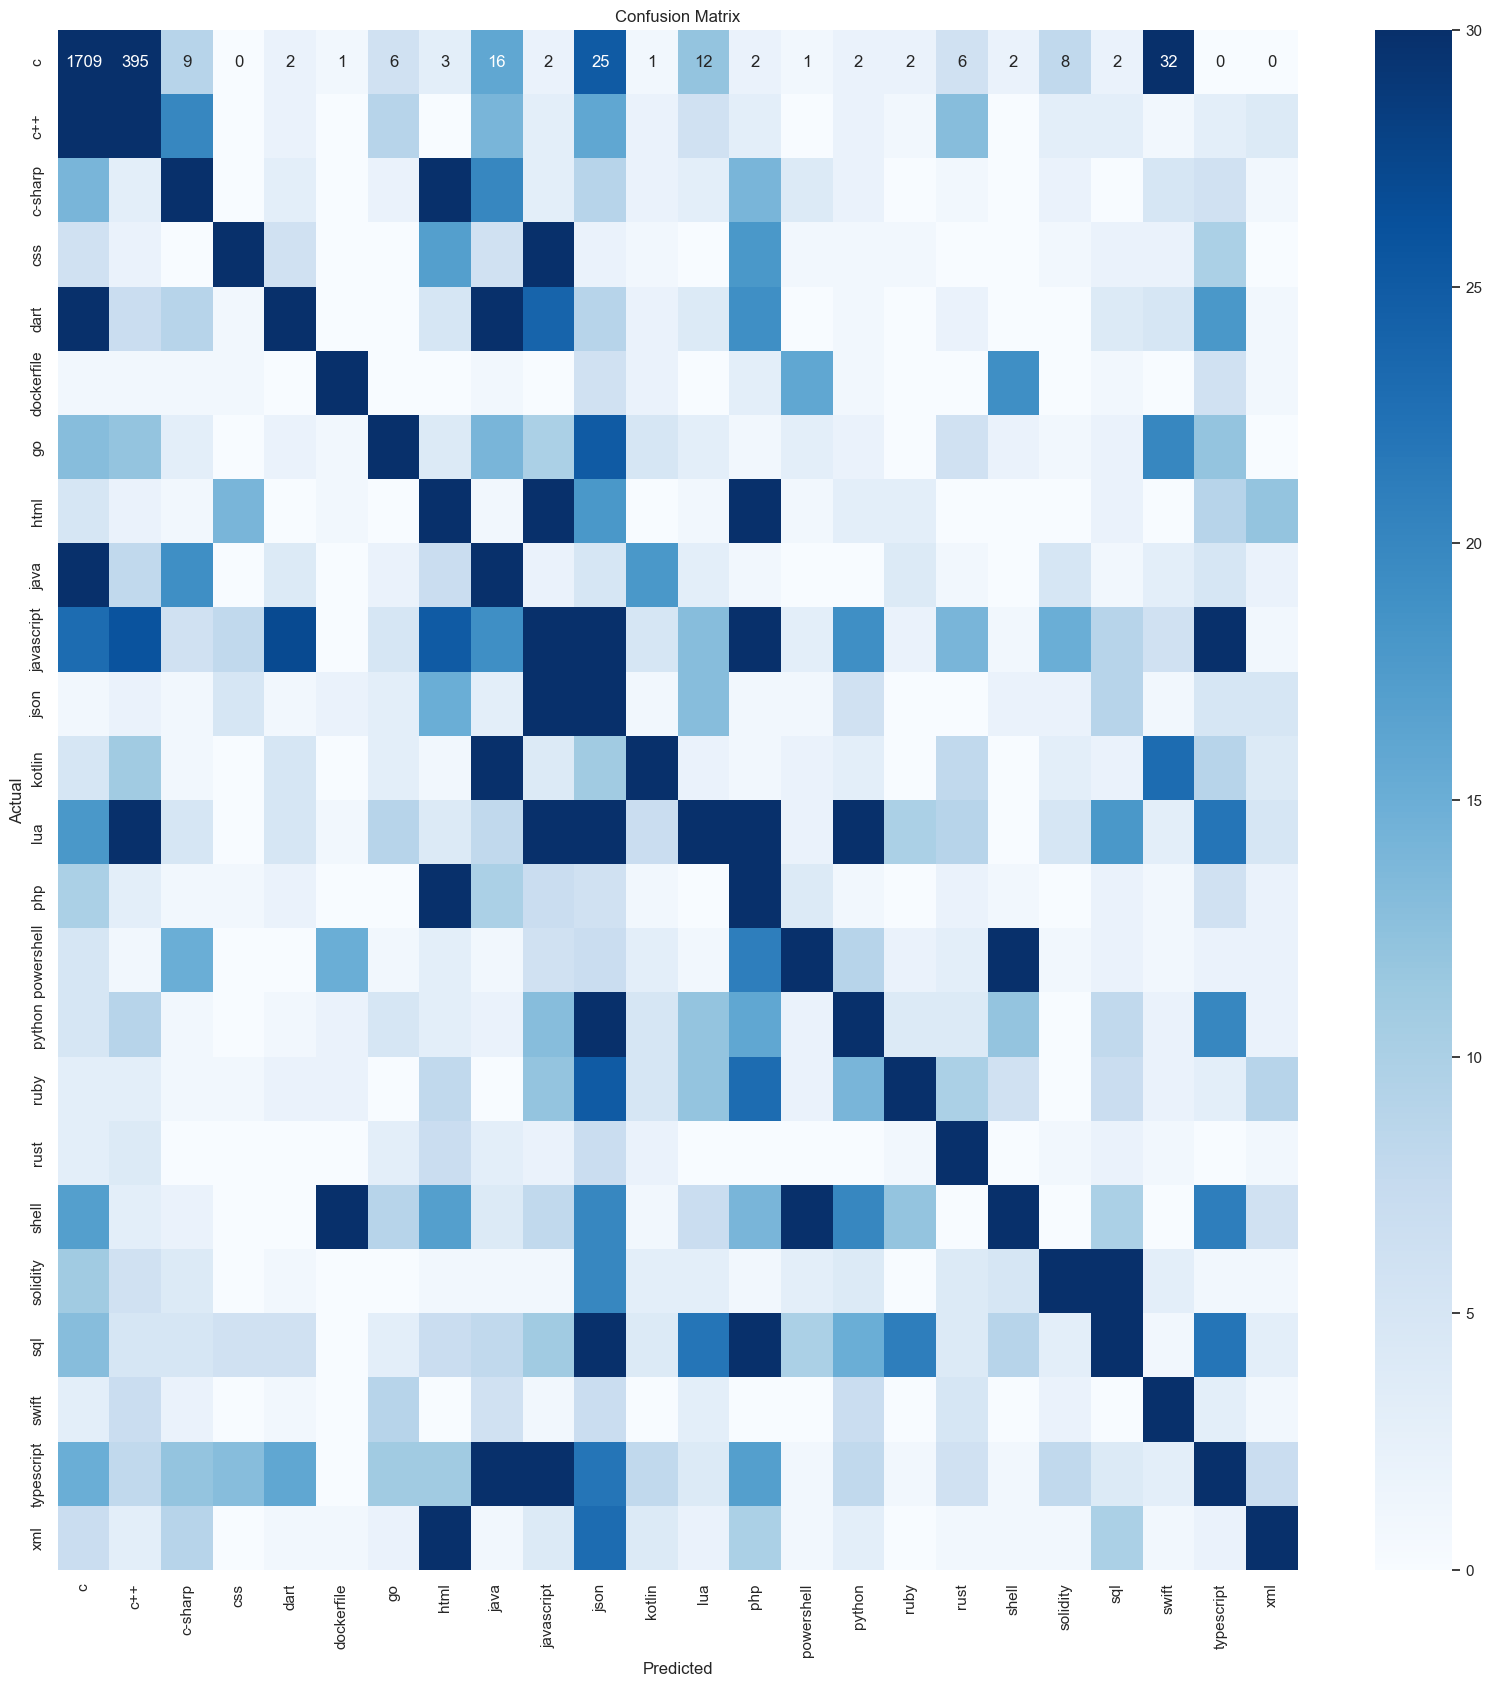

In [ ]:
generate_confusion_matrix(y_test, labels_test, model.classes_)

In [ ]:
%%timeit
r = model.predict([testing])[0]
r

3.19 ms ± 58 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
filename = 'neural_net.sav'
pickle.dump(model, open(filename, 'wb'))

## Naive Bayes

In [ ]:
model = Pipeline([
    ('tfidf', TfidfVectorizer(token_pattern=r"\b\w+\b|[.,!?;:'\n\t (){}\[\]\"`+*/<>=&|$%^~#]", ngram_range=(1,1))),  # Convert text data to TF-IDF features
    ('clf', (MultinomialNB()))
])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_final[0], df_final['class'], test_size=0.1)

In [ ]:
score = model.fit(X_train, y_train)
labels_train = model.predict(X_train)
score.score(X_train, y_train)

0.8964814814814814

In [ ]:
labels_test = model.predict(X_test)
score.score(X_test, y_test)

0.857

In [ ]:
# Train
print("----Train: ----\n")

print("Accuracy: " + str(accuracy_score(y_train, labels_train)))
print("Precision: " + str(precision_score(y_train, labels_train, average='macro')))
print("Recall: " + str(recall_score(y_train, labels_train, average='macro')))
print("F1_Score: " + str(f1_score(y_train, labels_train, average='macro')))

# Test
print("----Test: ----\n")

print("Accuracy: " + str(accuracy_score(y_test, labels_test)))
print("Precision: " + str(precision_score(y_test, labels_test, average='macro')))
print("Recall: " + str(recall_score(y_test, labels_test, average='macro')))
print("F1_Score: " + str(f1_score(y_test, labels_test, average='macro')))

----Train: ----

Accuracy: 0.8964814814814814
Precision: 0.913317047874867
Recall: 0.8964532953548513
F1_Score: 0.8996625236253953
----Test: ----

Accuracy: 0.857
Precision: 0.8790412659506206
Recall: 0.8572860811952737
F1_Score: 0.860443921515507


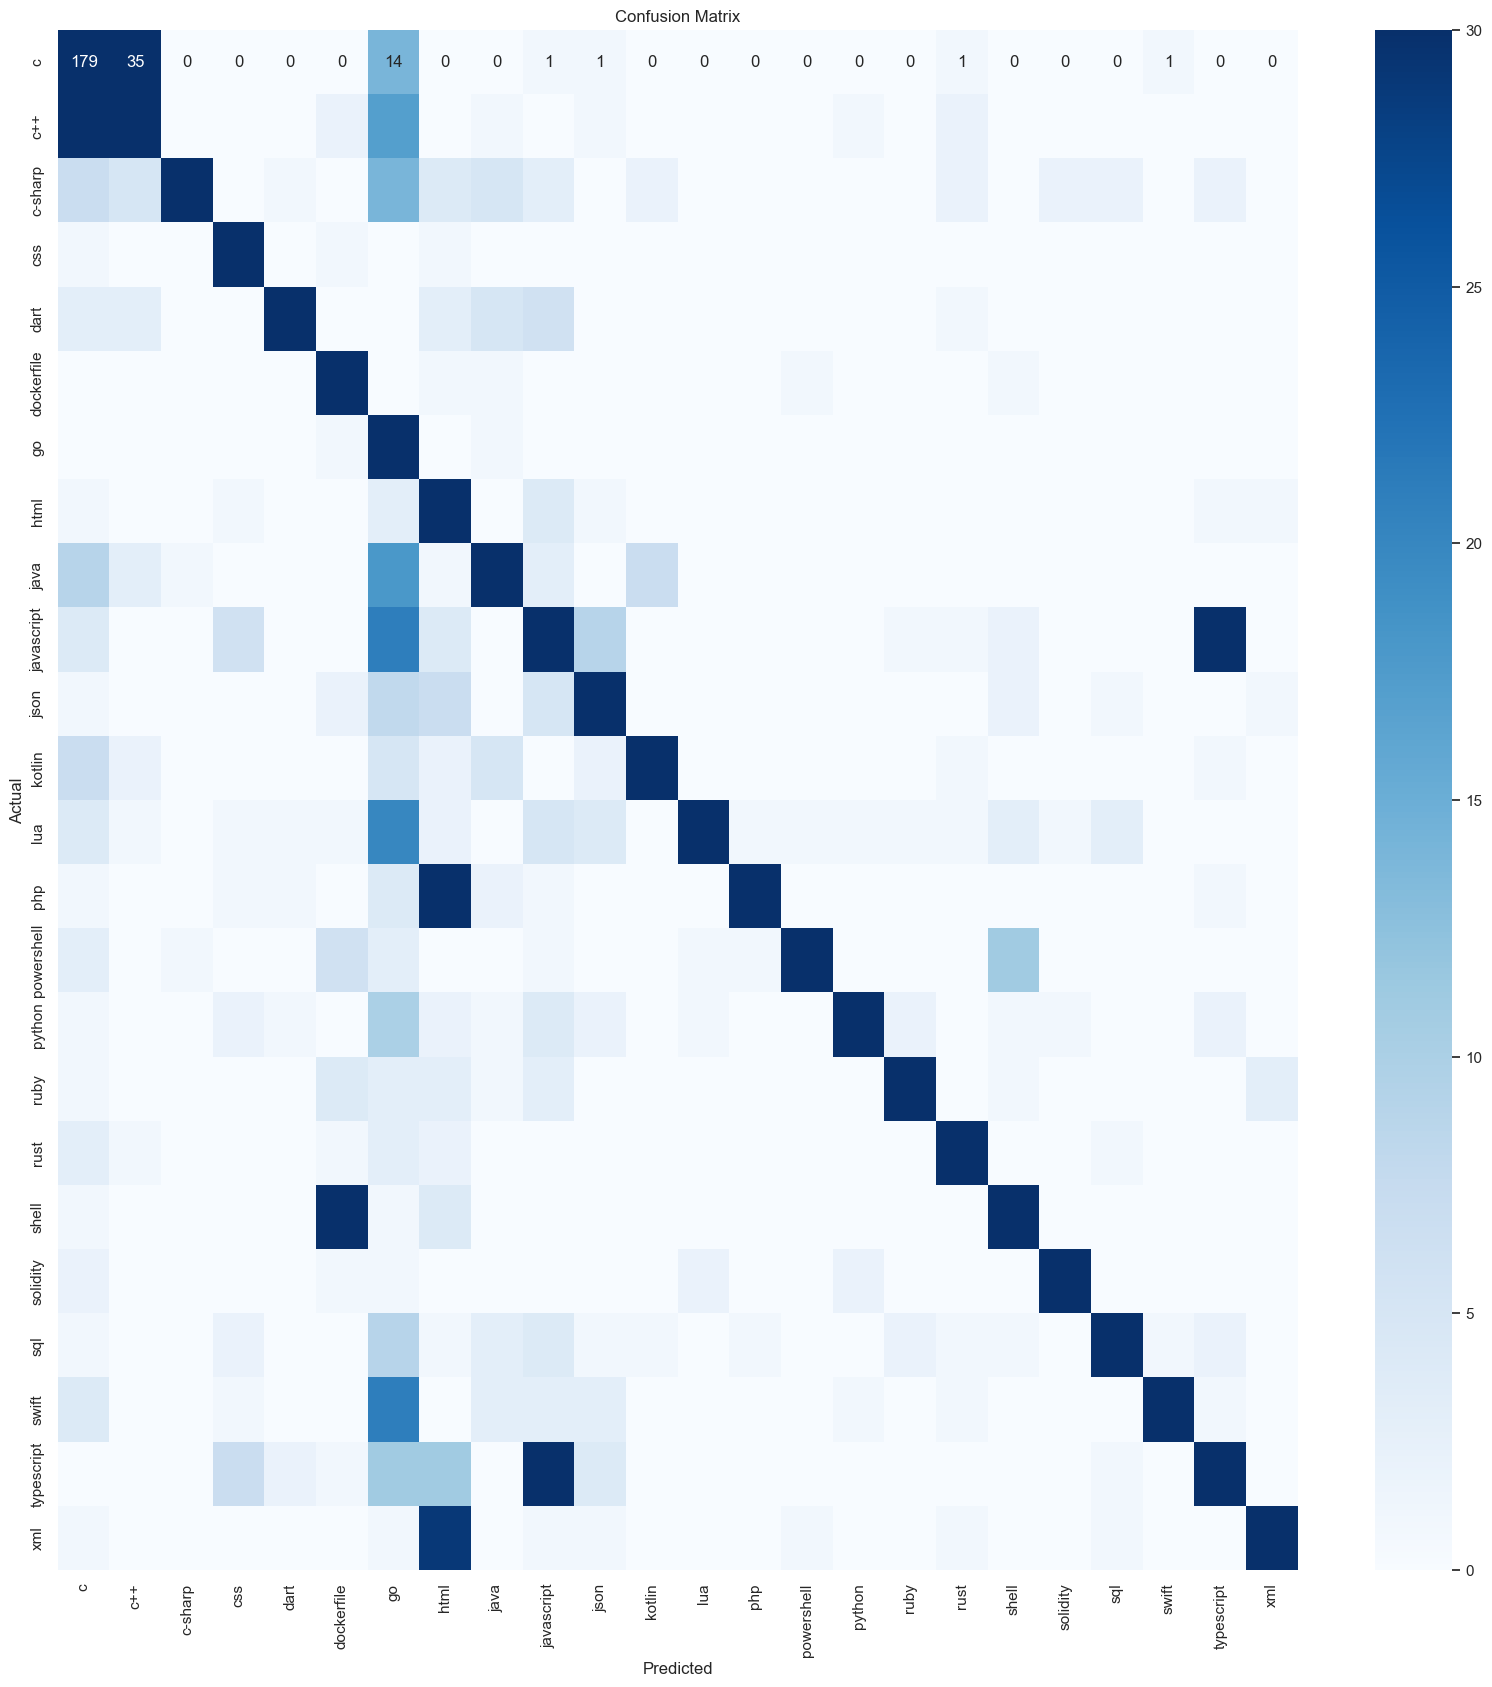

In [ ]:
generate_confusion_matrix(y_test, labels_test, model.classes_)

In [ ]:
%%timeit
r = model.predict([testing])[0]
r

152 ms ± 711 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
filename = 'naive_bayes.sav'
pickle.dump(model, open(filename, 'wb'))

# Texto vs código

In [ ]:
!wget http://thinknook.com/wp-content/uploads/2012/09/Sentiment-Analysis-Dataset.zip
!unzip Sentiment-Analysis-Dataset.zip

--2024-05-20 09:32:30--  http://thinknook.com/wp-content/uploads/2012/09/Sentiment-Analysis-Dataset.zip
Resolving thinknook.com (thinknook.com)... 107.180.114.91
Connecting to thinknook.com (thinknook.com)|107.180.114.91|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 56427677 (54M) [application/zip]
Saving to: ‘Sentiment-Analysis-Dataset.zip’

Sentiment-Analysis- 100%[===================>]  53.81M  69.4MB/s    in 0.8s    

2024-05-20 09:32:31 (69.4 MB/s) - ‘Sentiment-Analysis-Dataset.zip’ saved [56427677/56427677]

Archive:  Sentiment-Analysis-Dataset.zip
  inflating: Sentiment Analysis Dataset.csv  


In [ ]:
csv_file_path = 'Sentiment Analysis Dataset.csv'
df = pd.read_csv(csv_file_path, names=['i', 'sentiment', '_sentiment', '0'],on_bad_lines='skip', skiprows=1)
print(df)

               i  sentiment    _sentiment  \
0              1          0  Sentiment140   
1              2          0  Sentiment140   
2              3          1  Sentiment140   
3              4          0  Sentiment140   
4              5          0  Sentiment140   
...          ...        ...           ...   
1578607  1578623          1  Sentiment140   
1578608  1578624          1  Sentiment140   
1578609  1578625          0  Sentiment140   
1578610  1578626          0  Sentiment140   
1578611  1578627          0  Sentiment140   

                                                         0  
0                             is so sad for my APL frie...  
1                           I missed the New Moon trail...  
2                                  omg its already 7:30 :O  
3                  .. Omgaga. Im sooo  im gunna CRy. I'...  
4                 i think mi bf is cheating on me!!!   ...  
...                                                    ...  
1578607               Zzzzzz....

In [ ]:
pd.options.mode.chained_assignment = None

df_1 = df['0'].to_frame(name='0')
df_2 = df_1.assign(clas='text')
df_2


,0,clas
0,is so sad for my APL frie...,text
1,I missed the New Moon trail...,text
2,omg its already 7:30 :O,text
3,.. Omgaga. Im sooo im gunna CRy. I'...,text
4,i think mi bf is cheating on me!!! ...,text
...,...,...
1578607,Zzzzzz.... Finally! Night tweeters!,text
1578608,"Zzzzzzz, sleep well people",text
1578609,ZzzZzZzzzZ... wait no I have homework.,text
1578610,"ZzZzzzZZZZzzz meh, what am I doing up again?",text


In [ ]:
#root_dir = '/content/programming_language_data/' # Google Collab
root_dir = 'programming_language_data'
data = pd.DataFrame()
for class_folder in os.listdir(root_dir):
   if os.path.isdir(os.path.join(root_dir, class_folder)):
       with open(os.path.join(root_dir, class_folder, class_folder + '.txt'), 'r') as f:
           json_data = json.load(f)
           df_tmp = pd.DataFrame(json_data)
           df_tmp['class'] = "code"
           data = pd.concat([data, df_tmp], ignore_index=True )
df_final = pd.concat([data.set_axis(['text', 'class'], axis=1), df_2.head(60000).set_axis(['text', 'class'], axis=1)], ignore_index=True).sample(20000)

In [ ]:
model = Pipeline([
    ('tfidf', TfidfVectorizer(token_pattern=r"\b\w+\b|[.,!?;:'\n\t (){}\[\]\"`+*/<>=&|$%^~#]", ngram_range=(1,1))),  # Convert text data to TF-IDF features
    ('clf', (GradientBoostingClassifier(n_estimators=50, verbose=2)))  # Multi-output Random Forest
])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_final['text'], df_final['class'], test_size=0.1)

In [ ]:
score = model.fit(X_train, y_train)
labels_train = model.predict(X_train)
score.score(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           1.1973            1.59m
         2           1.0426            1.17m
         3           0.9135            1.02m
         4           0.8045            1.04m
         5           0.7113            1.11m
         6           0.6311            1.07m
         7           0.5615            1.04m
         8           0.5009           59.57s
         9           0.4476            1.00m
        10           0.4008           56.73s
        11           0.3595           56.55s
        12           0.3229           54.67s
        13           0.2904           51.56s
        14           0.2615           49.05s
        15           0.2358           47.54s
        16           0.2129           45.46s
        17           0.1924           44.11s
        18           0.1739           42.82s
        19           0.1575           41.64s
        20           0.1427           39.98s
        21           0.1295           39.42s
        2

0.9991666666666666

In [ ]:
labels_test = model.predict(X_test)
score.score(X_test, y_test)


0.9975

In [ ]:
# Train
print("----Train: ----\n")

print("Accuracy: " + str(accuracy_score(y_train, labels_train)))
print("Precision: " + str(precision_score(y_train, labels_train, average='macro')))
print("Recall: " + str(recall_score(y_train, labels_train, average='macro')))
print("F1_Score: " + str(f1_score(y_train, labels_train, average='macro')))

# Test
print("----Test: ----\n")

print("Accuracy: " + str(accuracy_score(y_test, labels_test)))
print("Precision: " + str(precision_score(y_test, labels_test, average='macro')))
print("Recall: " + str(recall_score(y_test, labels_test, average='macro')))
print("F1_Score: " + str(f1_score(y_test, labels_test, average='macro')))

----Train: ----

Accuracy: 0.9991666666666666
Precision: 0.9991718197879859
Recall: 0.9991628529969863
F1_Score: 0.999166642465861
----Test: ----

Accuracy: 0.9975
Precision: 0.9975044775402979
Recall: 0.9975
F1_Score: 0.9974999943749873


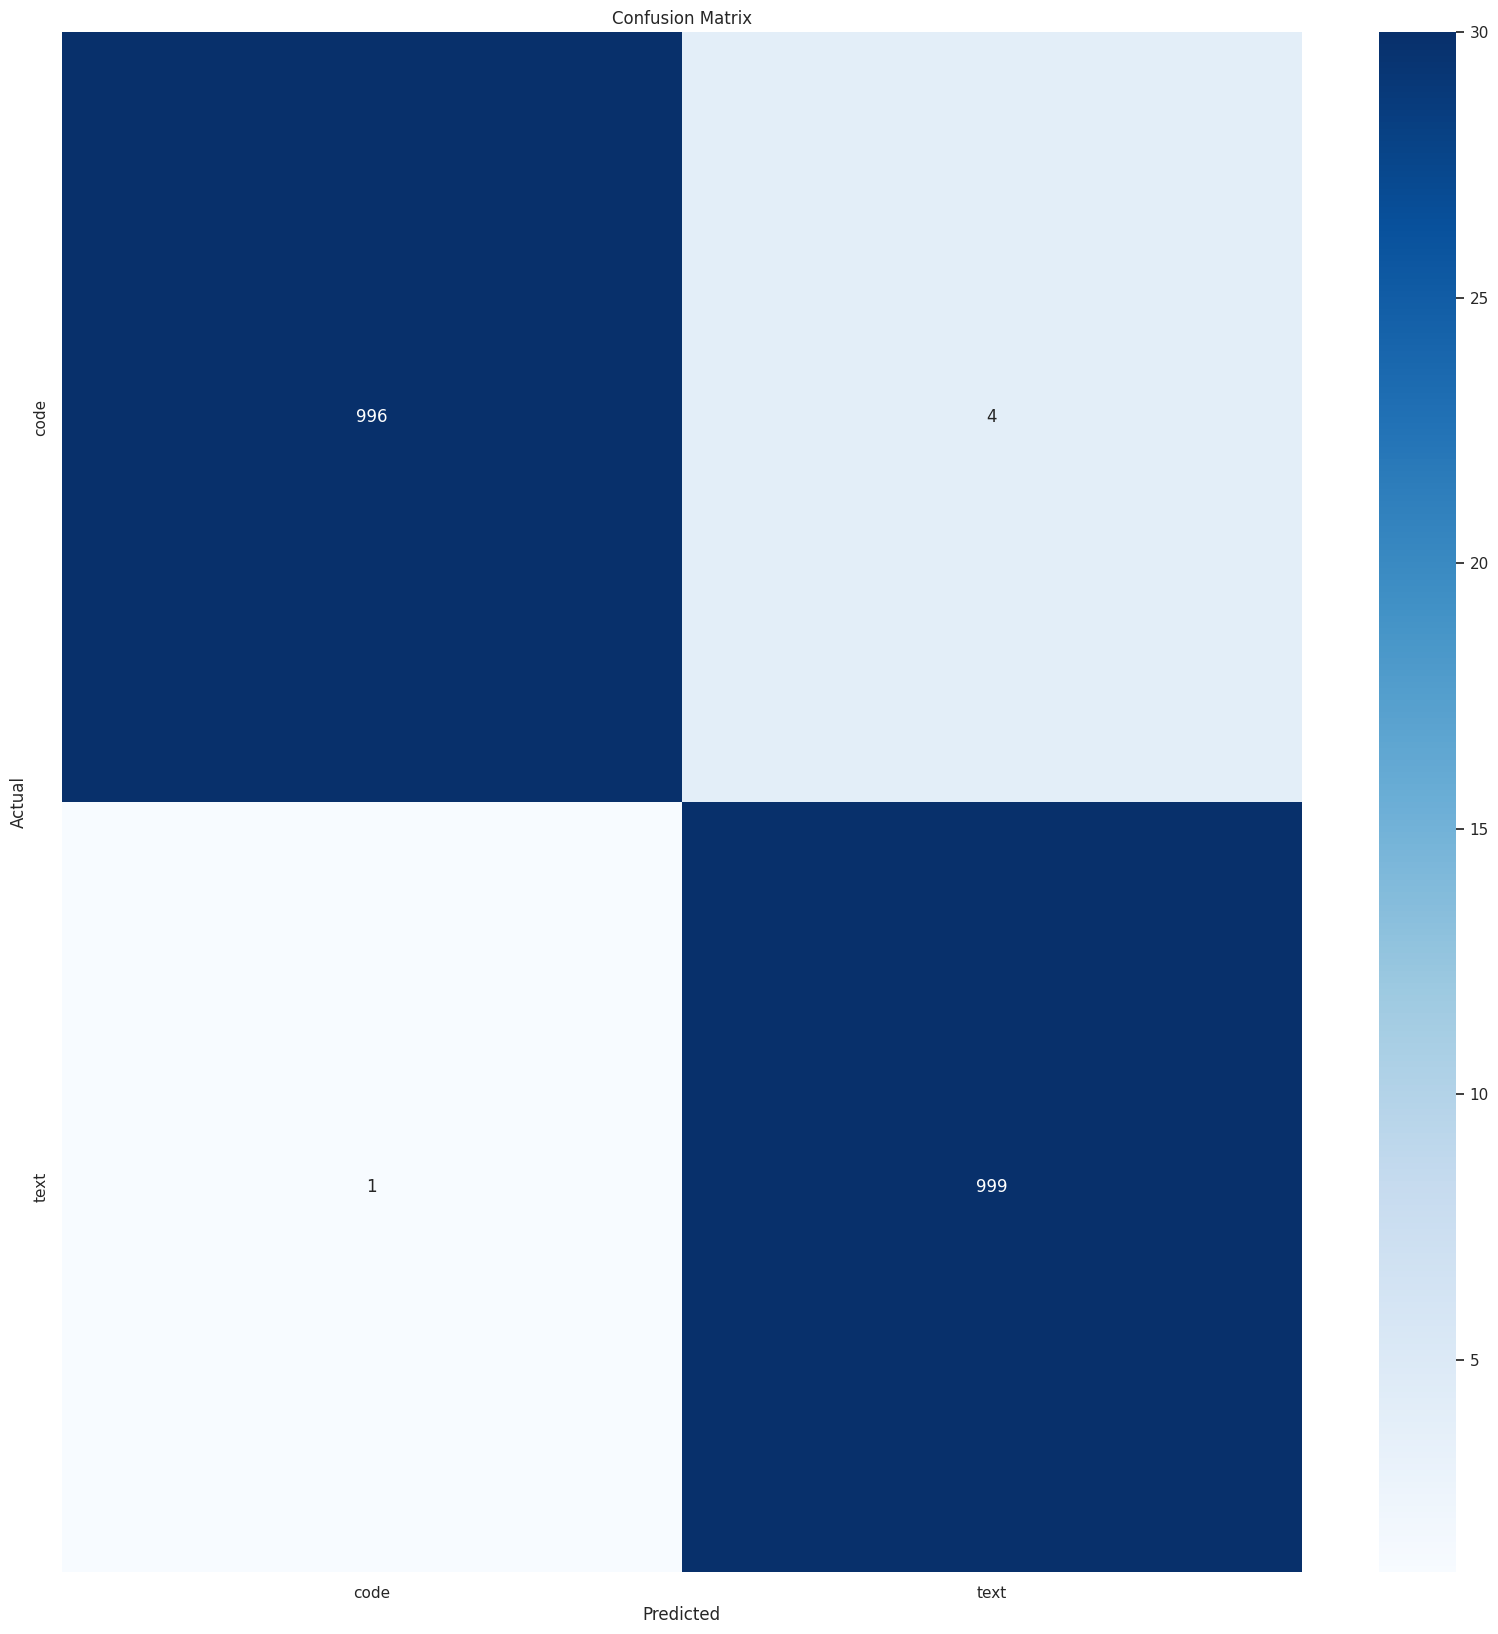

In [ ]:
generate_confusion_matrix(y_test, labels_test, model.classes_)


In [ ]:
%%timeit
r = model.predict([testing])[0]
r

9.65 ms ± 1.73 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
filename = 'text_or_code.sav'
pickle.dump(model, open(filename, 'wb'))

# Ejemplo

In [ ]:
import pickle


def import_random_forest():
    loaded_model = pickle.load(open("random_forest.sav", 'rb'))
    return loaded_model

def import_xgboost():
    loaded_model = pickle.load(open("xgboost.sav", 'rb'))
    return loaded_model

def import_neural_net():
    loaded_model = pickle.load(open("neural_net.sav", 'rb'))
    return loaded_model

def import_naive_bayes():
    loaded_model = pickle.load(open("naive_bayes.sav", 'rb'))
    return loaded_model

def import_text_or_code():
    loaded_model = pickle.load(open("text_or_code.sav", 'rb'))
    return loaded_model


In [ ]:
text_or_code = import_text_or_code()
result = text_or_code.predict(["""In August 1604, Cervantes wrote the prologue and the """])
print(result)

['text']


In [ ]:
result = text_or_code.predict(["""function quickSort(array, le, ri)
                                  if ri-le < 1 then
                                      return array
                                  end

                                  local left = le
                                  local right =  ri
                                  local pivot = math.random( le, ri )

                                  array[pivot], array[right] = array[right], array[pivot]

                                  for i = le, ri do
                                      if array[i] > array[right] then
                                          array[left], array[i] = array[i], array[left]

                                          left = left + 1
                                      end
                                  end

                                  array[left], array[right] = array[right], array[left]

                                  quickSort(array, 1, left-1)
                                  quickSort(array, left +1, ri)

                                  return array
                                  end"""])
print(result)

['code']


In [ ]:
xgboost = import_xgboost()
result = xgboost.predict(["""function quickSort(array, le, ri)
                                  if ri-le < 1 then
                                      return array
                                  end

                                  local left = le
                                  local right =  ri
                                  local pivot = math.random( le, ri )

                                  array[pivot], array[right] = array[right], array[pivot]

                                  for i = le, ri do
                                      if array[i] > array[right] then
                                          array[left], array[i] = array[i], array[left]

                                          left = left + 1
                                      end
                                  end

                                  array[left], array[right] = array[right], array[left]

                                  quickSort(array, 1, left-1)
                                  quickSort(array, left +1, ri)

                                  return array
                                  end"""])
print(result)

['lua']
